In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file1="bank_loan_data.csv"

## Read the data

In [3]:
loan_df=pd.read_csv(file1)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### number of observations

In [4]:
len(loan_df)

614

### number of columns

In [5]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### shape of data

In [6]:
loan_df.shape

(614, 13)

### types of columns

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan_df.drop('Loan_ID',inplace=True,axis=1)

In [9]:
catgorical=loan_df.select_dtypes(include="object")
catgorical

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


### catgorical data analysis

In [10]:
## if data has any missing values (will fill the missing values)
catgorical.isnull().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [11]:
loan_df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [12]:
 ## we fill the missing values mode method
# Gender_mode=loan_df['Gender'].mode()
# loan_df['Gender'].fillna(Gender_mode,inplace=True)

In [13]:
## we fill the missing values mode method
for col in catgorical:
    fill_value = loan_df[col].mode()[0]
    loan_df[col] = loan_df[col].fillna(fill_value)

In [14]:
catgorical.isnull().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [15]:
loan_df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## catgorical
### uni variate analysis

In [16]:
keys=loan_df['Gender'].value_counts().keys()
values=loan_df['Gender'].value_counts().to_list()

In [17]:
pd.DataFrame(zip(keys,values),columns=['Male','Female'],index=[1,2])

,Male,Female
1,Male,502
2,Female,112


Text(0.5, 1.0, 'Bar chart')

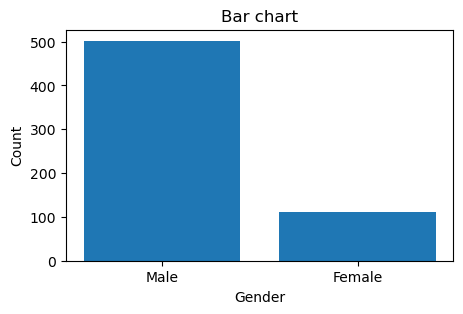

In [18]:
plt.figure(figsize=(5,3))
plt.bar(keys,values,data=loan_df)
plt.xlabel("Gender")
plt.ylabel('Count')
plt.title('Bar chart')

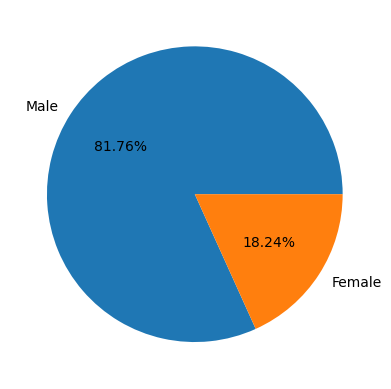

In [19]:
plt.pie(x=values,labels=keys,autopct='%0.2f%%',radius=1)
plt.show()

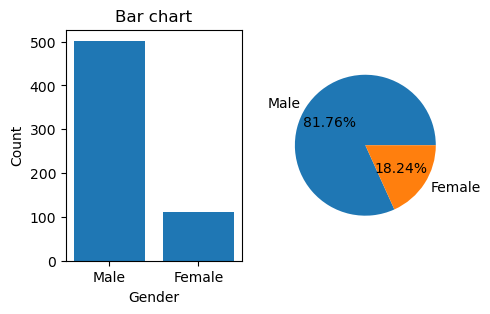

In [20]:
plt.figure(figsize=(5,3))
plt.subplot(1,2,1)
plt.bar(keys,values,data=loan_df)
plt.xlabel("Gender")
plt.ylabel('Count')
plt.title('Bar chart')
# plt.show()
plt.subplot(1,2,2)
plt.pie(x=values,labels=keys,autopct='%0.2f%%',radius=1)
#plt.subplot(1,2,1)
plt.show()

In [21]:
# for i in catgorical:
#     num=i
#     values=loan_df[num].value_counts().to_list()
#     keys=loan_df[num].value_counts().keys()
#     plt.figure(figsize=(8,5))
#     plt.subplot(1,2,1)
#     plt.bar(keys,values,data=loan_df)
#     plt.xlabel(num)
#     plt.ylabel("Count")
#     plt.title("Bar chart")
#     #plt.show()
#     plt.subplot(1,2,2)
#     plt.pie(x=values,labels=keys,autopct="%0.2f%%")
#     plt.title("pie chart")
#     plt.show()

## numerical columns

In [22]:
numerical=loan_df.select_dtypes(exclude="object")
numerical.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


## outliers

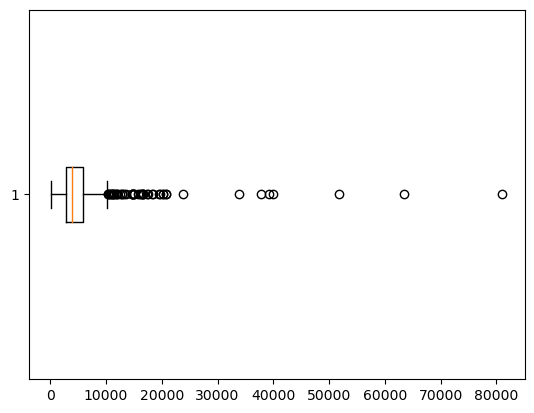

In [23]:
## black dots all are outliers
plt.boxplot(loan_df['ApplicantIncome'],vert=False)
plt.show()

## proced to find the outliers

## step-1

In [24]:
q1=np.percentile(loan_df['ApplicantIncome'],25)
q2=np.percentile(loan_df['ApplicantIncome'],50)
q3=np.percentile(loan_df['ApplicantIncome'],75)

In [25]:
q1,q2,q3

(2877.5, 3812.5, 5795.0)

## step-2
## caluclet == iqr=(q3-q1)

In [26]:
iqr=q3-q1
iqr

2917.5

## step-3

In [27]:
ub=(q3+1.5*iqr)
ub

10171.25

In [28]:
lb=q1-1.5*iqr
lb

-1498.75

In [29]:
con1=loan_df['ApplicantIncome']>ub
con1

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: ApplicantIncome, Length: 614, dtype: bool

In [30]:
con1=loan_df['ApplicantIncome']>ub
con1.sum()

50

In [31]:
con2=loan_df['ApplicantIncome']<lb
con2

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: ApplicantIncome, Length: 614, dtype: bool

In [32]:
outliers_df1=loan_df[con1|con2]
len(outliers_df1)

50

## Outliers(cat)

In [33]:
def outliers(col):
    q1=np.percentile(loan_df[col],25)
    q2=np.percentile(loan_df[col],50)
    q3=np.percentile(loan_df[col],75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    con1=loan_df[col]>ub
    con2=loan_df[col]<lb
    outliers_df=loan_df[con1|con2]
    print(f"{col} has {len(outliers_df)} outliers")
#num_col=loan_df.select_dtypes(exclude="object").columns
for col in numerical:
    outliers(col)

ApplicantIncome has 50 outliers
CoapplicantIncome has 18 outliers
LoanAmount has 0 outliers
Loan_Amount_Term has 0 outliers
Credit_History has 0 outliers


## No outliers_df

In [34]:
con11=loan_df['ApplicantIncome']<ub
con22=loan_df['ApplicantIncome']>lb
con11.sum(),con22.sum()

(564, 614)

In [35]:
len(outliers_df1)

50

In [36]:
non_outliers_df=loan_df[con11|con22]

In [37]:
len(non_outliers_df),len(outliers_df1)

(614, 50)

In [38]:
loan_df['ApplicantIncome'].count()

614

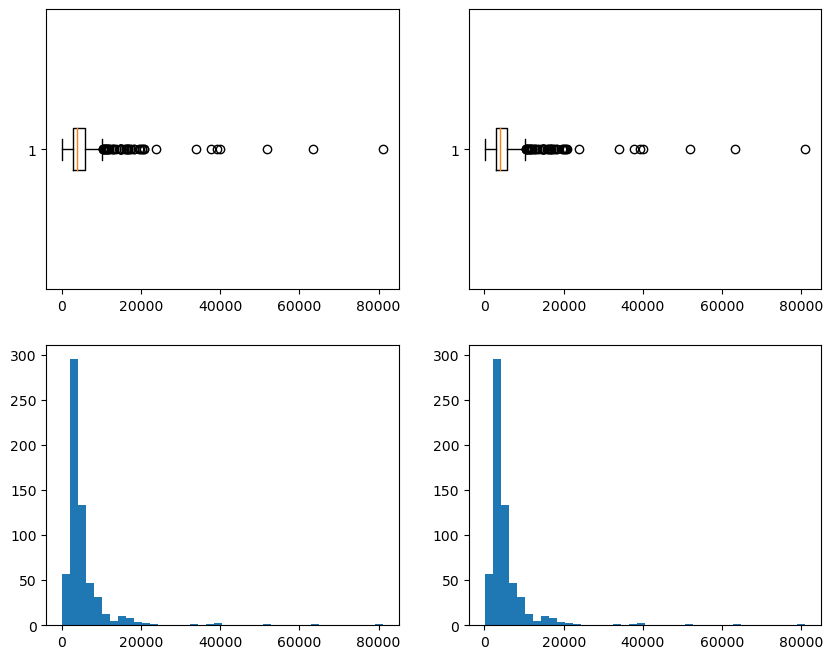

In [39]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.boxplot(loan_df['ApplicantIncome'],vert=False)
plt.subplot(2,2,2)
plt.boxplot(non_outliers_df['ApplicantIncome'],vert=False)
plt.subplot(2,2,3)
plt.hist(loan_df['ApplicantIncome'],bins=40)
plt.subplot(2,2,4)
plt.hist(non_outliers_df['ApplicantIncome'],bins=40)
plt.show()

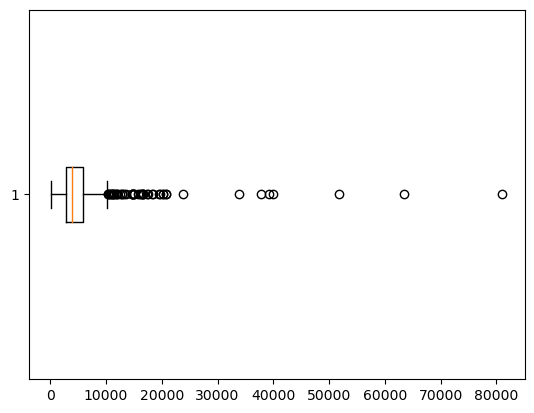

In [40]:
plt.boxplot(loan_df['ApplicantIncome'],vert=False)
plt.show()

In [41]:
##################### q1,q2,q3##############
q1=np.percentile(loan_df['ApplicantIncome'],25)
q2=np.percentile(loan_df['ApplicantIncome'],50)
q3=np.percentile(loan_df['ApplicantIncome'],75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
loan_df['ApplicantIncome']=np.where(loan_df['ApplicantIncome']>ub,ub,loan_df['ApplicantIncome'])
loan_df['ApplicantIncome']=np.where(loan_df['ApplicantIncome']>lb,lb,loan_df['ApplicantIncome'])

In [42]:
ub,lb

(10171.25, -1498.75)

In [43]:
median=loan_df['ApplicantIncome'].median()


In [44]:
loan_df['ApplicantIncome']=np.where(loan_df['ApplicantIncome']>ub,median,loan_df['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22e7e59b590>,
 'caps': [<matplotlib.lines.Line2D at 0x22e7db64050>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e7e59a950>],
 'medians': [<matplotlib.lines.Line2D at 0x22e7e558f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e7e55a7d0>],
 'means': []}

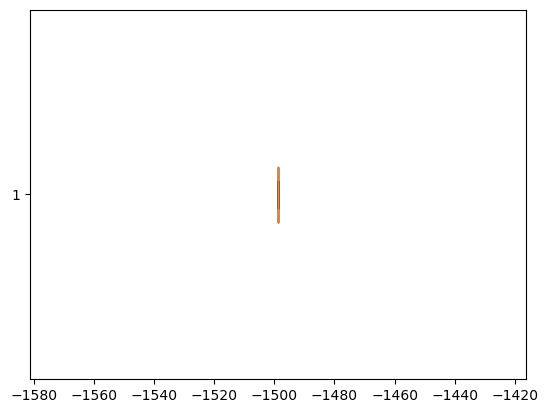

In [45]:
plt.boxplot(loan_df['ApplicantIncome'],vert=False)

In [46]:
num=loan_df.select_dtypes(exclude="object")

In [47]:
num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,-1498.75,0.0,NaN,360.0,1.0
1,-1498.75,1508.0,128.0,360.0,1.0
2,-1498.75,0.0,66.0,360.0,1.0
3,-1498.75,2358.0,120.0,360.0,1.0
4,-1498.75,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,-1498.75,0.0,71.0,360.0,1.0
610,-1498.75,0.0,40.0,180.0,1.0
611,-1498.75,240.0,253.0,360.0,1.0
612,-1498.75,0.0,187.0,360.0,1.0


In [48]:
for i in (num):
    print(i,loan_df[i].skew())

ApplicantIncome 0
CoapplicantIncome 7.491531216657306
LoanAmount 2.677551679256059
Loan_Amount_Term -2.362414124216269
Credit_History -1.8823610612186696


In [49]:
loan_df['Loan_Amount_Term']=1/(loan_df['Loan_Amount_Term'])

In [50]:
for i in (num):
    print(i,loan_df[i].skew())

ApplicantIncome 0
CoapplicantIncome 7.491531216657306
LoanAmount 2.677551679256059
Loan_Amount_Term 16.556219915921236
Credit_History -1.8823610612186696
